In [1]:
import requests 
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

"""
Collecting the number of US passport applications each fiscal year
"""
url ='https://data.cityofnewyork.us/resource/fc53-9hrv.json'
response = requests.get(url)
content = json.loads(response.content)
content

[{'station_name': 'DOC_MOBI_1',
  'agency': 'DOC',
  'no_of_ports': '1',
  'street': 'Hazen St',
  'city': "Riker's Island",
  'state': 'New York',
  'postcode': '10474'},
 {'station_name': 'DOH 56 DRIVE NISSAN',
  'agency': 'DOH',
  'no_of_ports': '1',
  'number': '56-17',
  'street': '56th Dr.',
  'city': 'Maspeth',
  'state': 'New York',
  'postcode': '11378',
  'borough': 'QUEENS',
  'latitude': '40.72441',
  'longitude': '-73.914492',
  'community_district': '402',
  'council_district': '30',
  'census_tract': '219',
  'bin': '4058946',
  'bbl': '4025850002',
  'nta': 'QN31'},
 {'station_name': 'DOH BEDFORD NISSAN 1',
  'agency': 'DOH',
  'no_of_ports': '1',
  'number': '485',
  'street': 'Throop Ave.',
  'city': 'Brooklyn',
  'state': 'New York',
  'postcode': '11221',
  'borough': 'BROOKLYN',
  'latitude': '40.685654',
  'longitude': '-73.941462',
  'community_district': '303',
  'council_district': '36',
  'census_tract': '277',
  'bin': '3051782',
  'bbl': '3018260001',
  'nta

In [2]:
Latitude = []
Longitude = []
for item in content:
    try:
        Latitude.append(item["latitude"])
        Longitude.append(item["longitude"])
    except KeyError:
        pass

In [3]:
Info = zip(Latitude, Longitude)
EV_data = pd.DataFrame(list(Info), columns=['Latitude', 'Longitude'])

In [4]:
EV_data=EV_data.drop_duplicates()
EV_data.reset_index(drop=True, inplace=True)

In [5]:
EV_data.Latitude=EV_data.Latitude.astype(float)
EV_data.Longitude=EV_data.Longitude.astype(float)

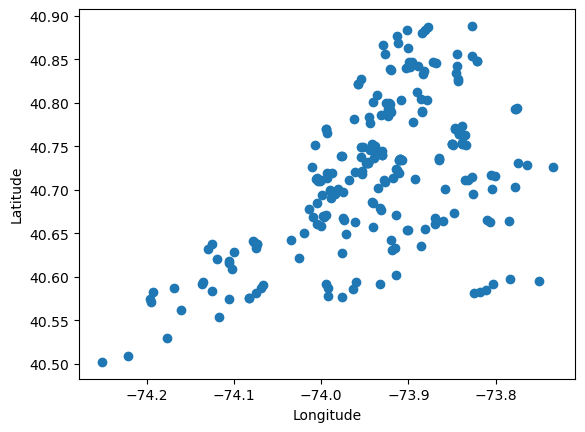

In [6]:
plt.scatter(EV_data.Longitude, EV_data.Latitude)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("New_York_EV_fleet_stations_scatter_raw.png", transparent=True)
plt.show()

In [7]:
import folium
m = folium.Map(location=[40.7, -74], zoom_start=11, tites='OpenStreetMap')

In [8]:
m

In [9]:
for i in range(len(EV_data.Latitude)):
    folium.CircleMarker(location=[EV_data.Latitude[i], EV_data.Longitude[i]],
                            radius=2,
                            weight=5).add_to(m)

In [10]:
m

In [11]:
m.save("New_York_EV_fleet_stations.html")